In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

** Get the input data  and save into X and Y matrices **

In [5]:
data = np.genfromtxt('ex2data1.txt', delimiter=',')

def matrix (inputarray):
    '''
    Takes numpy arrays of size m x n+1, where m is the number of rows and n is the number columns in X (not including x0)
    and the last column of the array is the Y vector. e.g.: x1,x2,...,xn, Y and then returns two numpy arrays:
         - X: X0,X1,X2,...,Xn where X0 is the ones vector size m
         - Y: Y 
    '''
    m = inputarray.shape[0]
    n = inputarray.shape[1]-1
    
    xones = np.ones((m,1)).reshape(m,1) # Reshape to make sure it is a column
    X = inputarray[:,0:n] # Matrix x1 to xn, note is the matrix wihtout x0
    X = np.c_[xones,X] # Maxtrix X, the matrix x0, x1, ... xn
    
    y = inputarray[:,-1].reshape((m,1))
    
    return X, y

X, y = matrix(data)
m, n = X.shape


** Visualise Data **

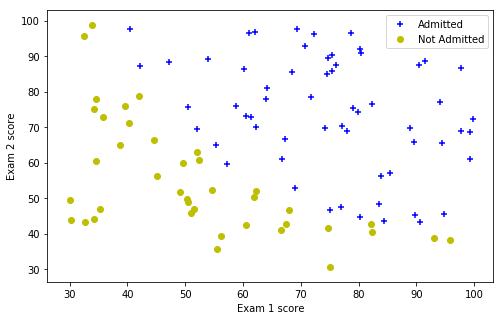

In [6]:
pos = np.where(y == 1)[0] # Creates a vector with the positions where y=1, admitted
neg = np.where(y == 0)[0] # Creates a vector with the positions where y=0, not admitted

plt.figure(figsize=(8,5))
plt.scatter(X[pos, 1], X[pos, 2], marker='+', c='b')
plt.scatter(X[neg, 1], X[neg, 2], marker='o', c='y')


plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Admitted', 'Not Admitted'])

plt.show()

** Define the Sigmoid function **


In [9]:
def sig (z):
    '''
    Takes scalar or np.array to calculate the element-wise sigmoid function and returns scalar or np.array
    '''
    return 1/(1+np.exp(-z))

** Test the Sigmoid function**

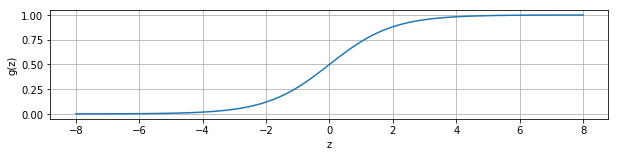

In [51]:
sigX =  np.linspace(-8,8,100)
sigY =  sig(sigX)

plt.figure(figsize=(10,2))
plt.plot(sigX,sigY)
plt.xlabel('z')
plt.ylabel('g(z)')
plt.grid(True)

plt.show()

** Cost Function **

In [31]:
def cost(theta,X,y):
    m,n = X.shape;
    theta = theta.reshape((n,1)) # Note the minimize formula might input theta vector of a different shape, hence the conversion
    h0 = sig(X @ theta)
    m = y.shape[0]
    J = (- y.T @ np.log(h0) - (1-y.T) @ np.log(1-h0))/m 
    return J

** Test the cost function**

In [29]:
theta = np.zeros(3)
print(cost(theta,X,y))
theta = np.array((-24,0.2,0.2))
print(cost (theta,X,y))

[[0.69314718]]
[[0.21833019]]


** Gradient Function **

In [24]:
def grad(theta,X,y):
    theta = theta.reshape((n,1)) # Note the minimize formula might input theta vector of a different shape, hence the conversion
    y = y.reshape((m,1))
    h0= sig(X @ theta)
    grad = X.T @ (h0-y)/m
    return grad.flatten()

** Test Gradient Function ** 
    

In [20]:
theta = np.zeros(n)
grad(theta,X,y)

array([ -0.1       , -12.00921659, -11.26284221])

** Solve Minimization problem**

In [52]:
theta = np.zeros(n)
#minimization by 
resultTNC = minimize(fun=cost, x0= theta, args = (X,y), method ='TNC', jac=grad).x
resultBFGS = minimize(fun=cost, x0= theta, args = (X,y), method ='BFGS', jac=grad).x

print ('TNC:')
print (resultTNC)
print ('BFGS:')
print (resultBFGS)

TNC:
[-25.16131869   0.20623159   0.20147149]
BFGS:
[-25.16133284   0.2062317    0.2014716 ]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


**Check some prediction**

In [116]:
def prediction(theta, X):
    m,n = X.shape
    theta = theta.reshape((n,1))
    return sig(X @ theta)>=0.5

theta = resultBFGS

ScoreTest1 = 45
ScoreTest2 = 85

input1 = np.array([[1,ScoreTest1,ScoreTest2]])

prediction(theta,input1)



array([[ True]])

** Test Accuracy on training set **

In [121]:
np.mean(prediction(theta,X) == y)

0.89